In [71]:
import GPy
import numpy as np
x = np.random.normal(size=[20, 10])
y = np.random.normal(size=[20, 1]) * 0.1

kern1 = GPy.kern.RBF(10)
model1 = GPy.models.GPRegression(x, y, kern1, noise_var=0.5)
model1['Gaussian_noise.variance'].constrain_bounded(1e-3,100)
model1.Gaussian_noise.variance = .5
print(model1['rbf.variance'])
print(model1['rbf.lengthscale'])
print(model1['Gaussian_noise.variance'])

kern2 = GPy.kern.RBF(10,ARD=True)
model2 = GPy.models.GPRegression(x, y, kern2, noise_var=1)
model2['Gaussian_noise.variance'].constrain_bounded(1e-3,10)
model2['rbf.lengthscale'].constrain_bounded(1e-3,100)
model2.optimize()
print(model2['rbf.variance'])
print(model2['rbf.lengthscale'])
print(model2['Gaussian_noise.variance'])

reconstraining parameters GP_regression.Gaussian_noise.variance
reconstraining parameters GP_regression.Gaussian_noise.variance
reconstraining parameters GP_regression.rbf.lengthscale


  index  |  GP_regression.rbf.variance  |  constraints  |  priors
  [0]    |                  1.00000000  |      +ve      |        
  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     1.00000000  |      +ve      |        
  index  |  GP_regression.Gaussian_noise.variance  |  constraints  |  priors
  [0]    |                             0.50000000  |  0.001,100.0  |        
  index  |  GP_regression.rbf.variance  |  constraints  |  priors
  [0]    |                  0.01034055  |      +ve      |        
  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     1.36996188  |  0.001,100.0  |        
  [1]    |                     2.13805640  |  0.001,100.0  |        
  [2]    |                     1.91665064  |  0.001,100.0  |        
  [3]    |                    99.99999598  |  0.001,100.0  |        
  [4]    |                    99.99963769  |  0.001,100.0  |        
  [5]    |                    

In [72]:
model2

GP_regression.,value,constraints,priors
rbf.variance,0.010340550763111795,+ve,
rbf.lengthscale,"(10,)","0.001,100.0",
Gaussian_noise.variance,0.001000000600229065,"0.001,10.0",


In [73]:
model1

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.5,"0.001,100.0",


In [74]:
y

array([[-0.03264995],
       [-0.13426758],
       [ 0.1114383 ],
       [-0.05865239],
       [-0.12368534],
       [ 0.08758389],
       [ 0.06233622],
       [-0.04349567],
       [ 0.140754  ],
       [ 0.01291016],
       [ 0.16169496],
       [ 0.05027409],
       [ 0.15588055],
       [ 0.01094027],
       [-0.12197444],
       [ 0.24493686],
       [-0.05457742],
       [-0.01988379],
       [-0.07003985],
       [-0.02033944]])

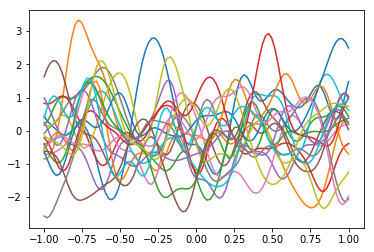

In [75]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.1)

np.random.seed(seed=123)
N_sim = 100
x_sim = np.linspace(-1, 1, N_sim)
x_sim = x_sim[:, None]
mu = np.zeros(N_sim)
cov = kernel.K(x_sim, x_sim)
y_sim = np.random.multivariate_normal(mu, cov, size=20)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(20):
    ax.plot(x_sim[:], y_sim[i,:])

 /home/taku/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


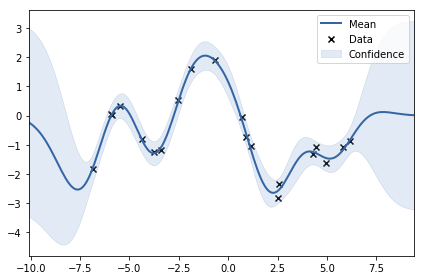

In [76]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)
# kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1) + GPy.kern.Linear(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
model = GPy.models.GPRegression(d.X[:, None], d.Y[:, None], kernel=kernel)
model.optimize()
model.plot()

## prediction
x_pred = np.linspace(-10, 10, 100)
x_pred = x_pred[:, None]
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]

In [134]:
ker1 = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .7, lengthscale=1.5)
ker3 = GPy.kern.RBF(1, .5, .5)

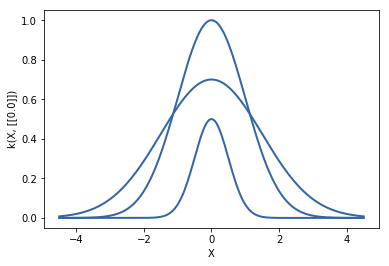

In [135]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())

In [79]:
help( GPy.kern.Bias)

Help on class Bias in module GPy.kern.src.static:

class Bias(Static)
 |  Parameterized class
 |  
 |  Say m is a handle to a parameterized class.
 |  
 |  Printing parameters:
 |  
 |      - print m:           prints a nice summary over all parameters
 |      - print m.name:      prints details for param with name 'name'
 |      - print m[regexp]: prints details for all the parameters
 |                           which match (!) regexp
 |      - print m['']:       prints details for all parameters
 |  
 |      Fields:
 |  
 |          Name:       The name of the param, can be renamed!
 |          Value:      Shape or value, if one-valued
 |          Constrain:  constraint of the param, curly "{c}" brackets indicate
 |                      some parameters are constrained by c. See detailed print
 |                      to get exact constraints.
 |          Tied_to:    which paramter it is tied to.
 |  
 |  Getting and setting parameters:
 |  
 |      Set all values in param to one:
 | 

{'covariance': [[<matplotlib.lines.Line2D at 0x7fa8f9f9c320>]]}

 /home/taku/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


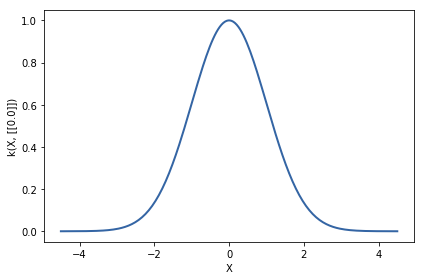

In [80]:
#kern = GPy.kern.Bias(1)
kern = GPy.kern.RBF(1)
#kern =GPy.kern.Matern32(1)
#kern = GPy.kern.RatQuad(1, lengthscale=.5, variance=.3)
#kern = GPy.kern.White(input_dim=1)
kern.plot()

 /home/taku/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'covariance': [<matplotlib.contour.QuadContourSet at 0x7fa8f9bd4710>]}

 /home/taku/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


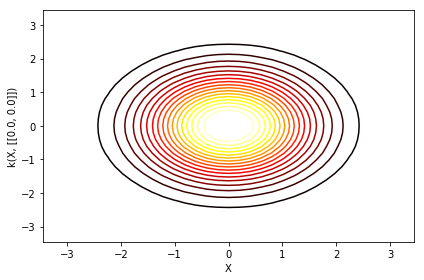

In [81]:
kern = GPy.kern.RBF(input_dim=2) 
kern.plot()

Text(0.5,1,'トレーニングデータ')

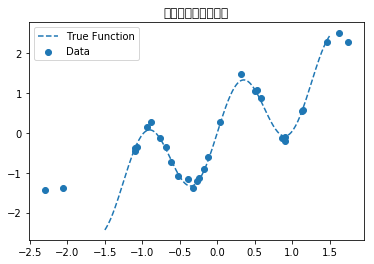

In [99]:
def true_func(x):
    """
    正しい関数
    
    :param np.array x:
    :return: 関数値 y
    :rtype: np.array
    """
    y = x + np.sin(5 * x)
    return y

np.random.seed(1)
x_train = np.random.normal(0, 1., 30)
y_train = true_func(x_train) + np.random.normal(loc=0, scale=.1, size=x_train.shape)
xx = np.linspace(-1.5, 1.5, 200)
plt.scatter(x_train, y_train, label="Data")
plt.plot(xx, true_func(xx), "--", color="C0", label="True Function")
plt.legend()
plt.title("トレーニングデータ")

In [100]:
import GPy.kern as gp_kern
#kern = gp_kern.PeriodicMatern32(input_dim=1) * gp_kern.RBF(input_dim=1)
kern = gp_kern.RBF(input_dim=1) #+ gp_kern.Bias(input_dim=1)
#kern = gp_kern.PeriodicExponential(input_dim=1)
gpy_model = GPy.models.GPRegression(X=x_train.reshape(-1, 1), Y=y_train.reshape(-1, 1), kernel=kern, normalizer=None)

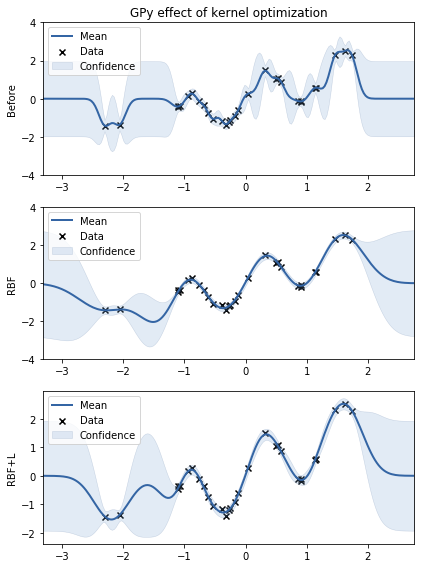

In [146]:
kern = gp_kern.RBF(input_dim=1, variance = 1e+0, lengthscale=.1)
gpy_model = GPy.models.GPRegression(X=x_train.reshape(-1, 1), Y=y_train.reshape(-1, 1), kernel=kern, noise_var=0.01)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(311)
gpy_model.plot(ax=ax1)  # 最適化前の予測

kern = gp_kern.RBF(input_dim=1)
gpy_model = GPy.models.GPRegression(X=x_train.reshape(-1, 1), Y=y_train.reshape(-1, 1), kernel=kern, noise_var=0.01)
gpy_model.optimize()
ax2 = fig.add_subplot(312, sharex=ax1)
gpy_model.plot(ax=ax2)  # カーネル最適化後の予測

kern = gp_kern.RBF(input_dim=1, variance = 1, lengthscale=.25)
gpy_model = GPy.models.GPRegression(X=x_train.reshape(-1, 1), Y=y_train.reshape(-1, 1), kernel=kern, noise_var=0.01)
gpy_model.rbf.lengthscale.fix()
gpy_model.optimize()
ax3 = fig.add_subplot(313, sharex=ax1)
gpy_model.plot(ax=ax3)

ax1.set_ylim(ax2.set_ylim(-4, 4))
ax1.set_title("GPy effect of kernel optimization")
ax1.set_ylabel("Before")
ax2.set_ylabel("RBF")
ax3.set_ylabel("RBF+L")
fig.tight_layout()

In [147]:
print(gpy_model)


Name : GP regression
Objective : 2.965891682251378
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.9598091995229918  |      +ve      |        
  rbf.lengthscale          |                 0.25  |   +ve fixed   |        
  Gaussian_noise.variance  |  0.00536933816866348  |      +ve      |        


In [114]:
help(gpy_model.optimize)

Help on method optimize in module GPy.core.gp:

optimize(optimizer=None, start=None, messages=False, max_iters=1000, ipython_notebook=True, clear_after_finish=False, **kwargs) method of GPy.models.gp_regression.GPRegression instance
    Optimize the model using self.log_likelihood and self.log_likelihood_gradient, as well as self.priors.
    kwargs are passed to the optimizer. They can be:
    
    :param max_iters: maximum number of function evaluations
    :type max_iters: int
    :param messages: whether to display during optimisation
    :type messages: bool
    :param optimizer: which optimizer to use (defaults to self.preferred optimizer), a range of optimisers can be found in :module:`~GPy.inference.optimization`, they include 'scg', 'lbfgs', 'tnc'.
    :type optimizer: string
    :param bool ipython_notebook: whether to use ipython notebook widgets or not.
    :param bool clear_after_finish: if in ipython notebook, we can clear the widgets after optimization.



In [156]:
s = np.random.normal(1, 1)

In [157]:
np.array([[s]])

array([[1.16003707]])